#Machine Learning(기계 학습)

* __지도 학습(supervised learning)__: 레이블이 있는 데이터로 모델을 훈련시키는 것.
    * __분류(classification)__: 클래스를 분류.
    * __회귀(regression)__: 숫자 값을 예측.
* __비지도 학습(unsupervised learning)__: 레이블이 없는 데이터로 모델을 훈련시키는 것.
* __준지도 학습(semi-supervised learning)__: 비지도학습 + 전문가시스템
* __강화 학습(reinforcement learning)__: 보상과 벌칙을 통해서 학습(훈련).

# Objectives 문제정의

fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측.
* 농어(Perch)의 길이(Length)로만 무게(Weight)를 예측.
 * Weight(관심변수, 종속변수, 레이블) ~ Length(독립변수, 특성)
 * KNN, Linear Regression
* 농어의 여러가지 특성들(Length, Diagonal, ...)로 무게(Weight)를 예측
 * Weight~ Length + Diagonal + Height + Width
 * Linear Regression

* ML 순서
1. 데이터 준비
2. 탐색 - 시각화, NA처리, ...
3. 훈련 / 테스트 셋 분리
4. 전처리 - scaling, one-hot-encoding, ...
5. 모델 훈련
6. 평가
7. 하이퍼 파라미터 튜닝


#fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측.

##import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline # Transfomer(변환기)와 Estimator(예측기)를 연결해주는 라인
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 숫자 예측
from sklearn.linear_model import LinearRegression  # 선형회귀 알고리즘을 사용한 숫자 예측
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # 회귀 문제에서의 평가 지표

## 1. 데이터준비

In [ ]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
perch = fish[fish['Species']=='Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
* 특성(feature), 독립 변수 : Length
* 타겟(target) | 레이블(label), 종속(관심)변수 : Weight

In [ ]:
# X : 특성(2차원) 배열 - 독립 변수
# y: 타겟(1차원) 배열 - 종속 변수
X = perch[['Length']].values.copy() #> (56, 1) 2차원 배열
y = perch['Weight'].values.copy() #> (56,) 1차원 배열

In [ ]:
X.shape, y.shape

((56, 1), (56,))

In [ ]:
X[:5] # DF (2차원)으로 만들고 값만 copy

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [ ]:
y[:5] # Series (1차원)으로 만들고 값만 copy, column이 없어야함

array([ 5.9, 32. , 40. , 51.5, 70. ])

## 3. 훈련/테스트 셋 분리

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

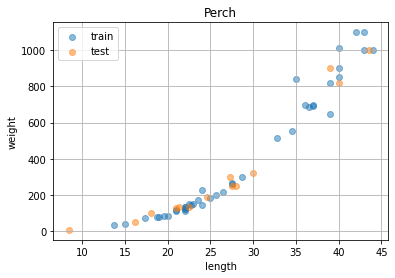

In [ ]:
# Weight ~ Length 시각화. 훈련셋 / 테스트 셋 색깔 다르게

plt.scatter(X_tr, y_tr, alpha=0.5, label='train')
plt.scatter(X_te, y_te, alpha=0.5, label='test')

plt.legend()
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Perch')
plt.grid()
plt.show()

## KNN Regressor 모델 훈련, 평가

KNN(k-Nearest Neighbors) Regressor: 가장 가까운 K개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측하는 방법

In [ ]:
knn_reg = KNeighborsRegressor() #k=5인 knn 회귀모델을 생성

In [ ]:
knn_reg.fit(X_tr, y_tr) # 모델 훈련

KNeighborsRegressor()

In [ ]:
tr_pred = knn_reg.predict(X_tr) #훈련셋의 예측값 - 훈련 셋 농어의 무게 예측값
tr_pred
# 확률(proba)을 계산하는건 분류에만 있고, 회귀에는 없음
# 숫자예측인데 확률을 예측하지는 않으니까

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [ ]:
y_tr # 훈련 셋 실젯값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
# 0번 훈련 셋 샘플의 가장 가까운 이웃 5개
neighbor_index = knn_reg.kneighbors([X_tr[0]], return_distance=False)
neighbor_index

array([[ 0, 10, 36,  2, 17]])

In [ ]:
y_tr[neighbor_index[0]]

array([ 85.,  85.,  80.,  78., 115.])

In [ ]:
y_tr[neighbor_index[0]].mean()

88.6

In [ ]:
# 테스트 셋의 (농어 무게) 예측값
te_pred = knn_reg.predict(X_te)
te_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [ ]:
# 테스트 셋 (농어 무게) 실젯값
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
neighbor_index = knn_reg.kneighbors([X_te[0]], return_distance=False)
neighbor_index

array([[23, 25,  3,  2, 36]])

In [ ]:
y_tr[neighbor_index[0]]

array([32., 40., 70., 78., 80.])

In [ ]:
y_tr[neighbor_index[0]].mean()

60.0

## 회귀 모델 평가지표

## 회귀 문제에서의 평가 지표:

* 기호 정의
    * $y_i$: $i$번째 샘플의 실젯값(label)
    * $\hat{y_i}$: $i$번째 샘플의 예측값
    * $\bar{y}$: 타겟의 평균값
    * $n$: 샘플 개수

* MSE(Mean Squared Errors): 오차들의 제곱의 평균 (음수도 있으므로 양수로 만들기위해 제곱)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

* RMSE(Root Mean Squared Errors): MSE의 제곱근
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
$$

* MAE(Mean Absolute Errors): 오차들의 절대값의 평균
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* $R^2$ score(결정 계수, coefficient of determinant)
$$
R^2 = 1 - \frac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$

    * 일반적인 평가 지표는 점수가 높을 수록 좋은 모델, 점수가 낮을 수록 나쁜 모델.
    * 그런데, 회귀 문제에서는 오차(MSE, MAE)는 작을 수록 좋은 점수이고 더 좋은 성능(오차가 적은) 의 회귀모델임, 오차가 클 수록 나쁜 모델.
    * 회귀 문제에서도 점수가 높을 수록 좋은 모델이고 점수가 낮을 수록 나쁜 모델이라고 평가할 수 있는 지표가 필요. --> **$R^2$ score(결정 계수)**
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측한다면 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값이 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측한다면(즉, 오차가 매우 작다면) 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면 분자 = 분모 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하는 모델이라면(오차가 매우 크다면), 분자 > 분모 일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.
    * 즉, 결정 계수는 1에 가까울 수록 오차가 작은 좋은 예측 모델이고, 숫자가 작아질 수록 오차가 큰 나쁜 예측 모델임.

In [ ]:
# 훈련 셋의 MSE
# 모든 평가지표는 (실제값,예측값) 이렇게 인수를 넣어준다.
mean_squared_error(y_tr, tr_pred)

3716.5161904761903

In [ ]:
# 훈련 셋의 RMSE
np.sqrt(mean_squared_error(y_tr, tr_pred))

60.96323638453089

In [ ]:
# 훈련 셋의 MAE
mean_absolute_error(y_tr, tr_pred)

35.76190476190476

In [ ]:
# 훈련 셋의 R^2 score : 오차가 전혀 없는 경우 최댓값이 1, 오차가 있는 경우 1보다 작아짐
r2_score(y_tr, tr_pred)
# 1에 가까울수록 오차가 작은 모델, 1에 멀어질 수록 오차가 큰 모델 (안 좋은모델)

0.9698823289099254

In [ ]:
# 모든 머신러닝모델은 fit, score, transform 을 갖고있다
knn_reg.score(X_tr, y_tr)
# 회귀모델의 score메서드는 r2_score를 계산해준다.

0.9698823289099254

In [ ]:
# 테스트 셋의 MSE
mean_squared_error(y_te, te_pred) # train mse > test mse
# test mse의 오차가 훈련셋의 train mse보다 더 작다는건 
# train 보다 test에 더 잘맞춘다는거고 훈련셋에 fit이 제대로 잘 안됐다는 거니까 과소적합이다.

721.7385714285714

In [ ]:
# 테스트 셋의 RMSE
np.sqrt(mean_squared_error(y_te, te_pred))

26.865192562655704

In [ ]:
# 테스트 셋의 R2 score
r2_score(y_te, te_pred) # train r2 < test r2
# test r2 점수가 train r2보다 더 크니까 test에 더 잘맞는다는거고 그래서 과소적합이다.

0.992809406101064

In [ ]:
knn_reg.score(X_te,y_te)

0.992809406101064

## Scikit-learn Class
* Estimator(예측기, 추정기) 3가지 메서드를 갖고 있다.
 * fit
 * predict
 * score
 * **KNNClassifier, KNNregressor**(score -> 결정계수가 계산되서 나온다)
* transformer(변환기) 2가지 메서드를 갖고 있다.
 * fit
 * transform
 * fit_transform
 * **StandardScaler, MinMaxScaler**

## KNN Regressor 모델의 문제점

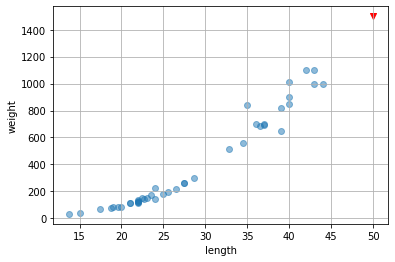

In [ ]:
# 훈련 셋 시각화
plt.scatter(X_tr, y_tr, alpha=0.5)

# 가상의 물고기(농어) : 길이 50cm, 무게 1500g
plt.scatter(50, 1_500, color='r', marker='v')

plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

그림에서 알 수 있듯이, 훈련데이터(농어 길이)의 최댓값 또는 최솟값에서 많이 벗어난 테스트 셋인 경우
(outlier) 예측값을 가까운 이웃들의 평균값으로만 예측하기 때문에, 그 평균값이 실젯값과는 많이 다를 수 있음(오차가 클 수 있음). 

In [ ]:
# 길이 50cm인 가상의 물고기의 무게 예측값
prediction = knn_reg.predict([[50]])
prediction
# 이상치는 잘 잡지만 결과적으로 정확도는 떨어진다.

array([1010.])

In [ ]:
index = knn_reg.kneighbors([[50]], return_distance=False)
index # 50cm 물고기에서 가장 가까운 훈련 셋 샘플 5개의 인덱스

array([[34, 14,  8, 40,  6]])

In [ ]:
y_tr[index[0]] # 가장 가까운 이웃들의 5개의 무게

array([1000., 1100., 1000., 1100.,  850.])

In [ ]:
y_tr[index[0]].mean() # 50cm 물고기의 예측값과 같음

1010.0

머신 러닝 알고리즘:
* 사례 기반 학습 (instance-based learning): KNN(k-Nearest Neighbors). ...
 * 수학적인 모델을 만들지 않고, 훈련 셋 데이터의 특징들을 사용해서 예측.
 * outlier들이 많은 경우에는 성능이 떨어질 수 있음.
* 모델 기반 학습 (model-based learning): Linear Regression, ...
 * 훈련 셋을 사용해서 수학적인 모델을 만들고, 그 수학적인 모델로 예측값을 계산


## Linear Regression

In [ ]:
lin_reg = LinearRegression() # 선형 회귀 머신 러닝 모델 생성

In [ ]:
lin_reg.fit(X_tr, y_tr) # 모델 학습(훈련): y= ax+b 방정식의 계수(a,b)를 찾음.
# X= length , y= Weight

LinearRegression()

In [ ]:
# 선형 회귀 모델 학습 결과 (1): coef_ 직선의 기울기. y=ax+b에서 a . x(독립 변수)에 곱하는 계수
lin_reg.coef_

array([39.01714496])

In [ ]:
# 선형 회귀 모델 학습 결과 (2): intercept_ 직선의 y절편. y=ax+b에서 b
lin_reg.intercept_

-709.0186449535477

In [ ]:
39 * 50 - 709 # 50cm 물고기의 무게 예측값

1241

In [ ]:
# 훈련 셋의 예측값
tr_pred = lin_reg.predict(X_tr)
tr_pred[:4] #공식에 계산하기때문에 음수가 나올 수 있음. 
# 사례기반학습에선 음수가 나올 수 없지만 모델 기반 학습에선 음수가 나올 수 있음.

array([ 55.71739633, 149.35854425,  20.60196587, -30.12032259])

In [ ]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [ ]:
mean_squared_error(y_tr, tr_pred)
# 결과를 보면 knn보다 오차가 더 크므로 수학적인 모델이 항상 더 좋은것은 아니다

7422.953552609781

In [ ]:
r2_score(y_tr, tr_pred) # 아래와 같은 결과

0.939846333997604

In [ ]:
lin_reg.score(X_tr,y_tr) # knn보다 정확도가 작음 -> 오차가 큰것

0.939846333997604

In [ ]:
te_pred = lin_reg.predict(X_te) # 테스트 셋 예측값
te_pred

array([-381.27462726,   -6.71003561,  363.95284155,  122.04654277,
        168.86711673,  851.66715359,  461.49570396,  250.80312115,
        812.65000863,  110.34139928,  988.22716096,  -76.94089654,
        383.46141403,  356.14941255])

In [ ]:
y_te # 테스트 셋 실젯값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
r2_score(y_te,te_pred) #KNN 결과보다 나쁨.

0.8247503123313558

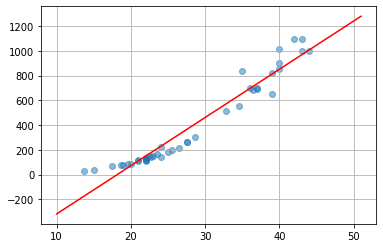

In [ ]:
#훈련 셋 산점도
plt.scatter(X_tr,y_tr, alpha=0.5)
# y=ax+b : 선형 회귀식(직선의 방정식)- 선 그래프
a = lin_reg.coef_[0] #직선의 기울기
b = lin_reg.intercept_ #직선의 y절편(x=0일 때 직선이 y축과 만나는 점)
x = np.arange(10, 51, 0.001)
y= a*x + b
plt.plot(x,y, 'r-')

plt.grid()
plt.show()

In [ ]:
Xb = np.c_[X_tr, np.ones(len(X_tr))]
# 기존 컬럼에 컬럼박치기
# _c: 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

In [ ]:
Xb.shape

(42, 2)

In [ ]:
Xb[:5]

array([[19.6,  1. ],
       [22. ,  1. ],
       [18.7,  1. ],
       [17.4,  1. ],
       [36. ,  1. ]])

선형 회귀의 목적은 선형 회귀 방정식에서 예측하는 값과 실젯값 사이의 오차들(MSE)이 가장 작은 방정식을 찾는 것.
$$
\mathbf{y} = \mathbf{X} \cdot \mathbf{w}
$$

정규 방정식(Noraml Equation)을 풀면 RMSE를 최소로 만드는 선형 회귀식의 coefficients(기울기)와 intercept(y절편)를 계산할 수 있음.
$$
\mathbf{w} = {({\mathbf{X}}^{T} \cdot \mathbf{X})}^{-1} \cdot {\mathbf{X}}^{T} \cdot \mathbf{y}
$$

그래서, Linear Regression 알고리즘은 훈련 셋 데이터와 레이블을 사용해서 정규 방정식을 풀고 선형 회귀식(직선의 방정식)의 계수들을 찾음.

In [ ]:
np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y_tr

array([  39.01714496, -709.01864495])

## 2차항을 포함하는 선형 회귀

In [ ]:
X_tr.shape, y_tr.shape

((42, 1), (42,))

In [ ]:
X_tr[:5] # 훈련 셋의 첫 5개 생선의 길이(length)

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [ ]:
# x^2 항을 추가해서 (n_samples, 2) shape을 갖는 2차원 배열 만듦.
# 2차항을 추가한 훈련 셋
X_tr_poly = np.c_[X_tr **2,X_tr]
X_tr_poly.shape

(42, 2)

In [ ]:
X_tr_poly[:5] #length와 length**2을 컬럼으로 갖는 2차원 배열
# 2차 선형 회귀에서 학습시킬 데이터

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [ ]:
lin_reg = LinearRegression() #선형 회귀 모델 생성 

In [ ]:
lin_reg.fit(X_tr_poly,y_tr) # 2차항을 가지고 있는 데이터로 회귀 모델을 학습

LinearRegression()

In [ ]:
lin_reg.coef_ # y=ax^2 + bx + c 에서 a와 b

array([  1.01433211, -21.55792498])

In [ ]:
lin_reg.intercept_ # y=ax^2 + bx +c 에서 c

116.0502107827827

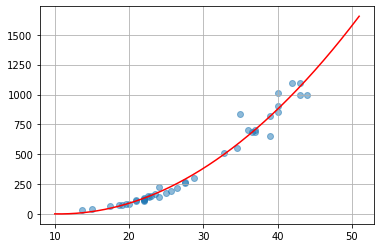

In [ ]:
# 훈련 셋 산점도
plt.scatter(X_tr,y_tr, alpha=0.5)

# 2차항을 포함하는 선형회귀식 : y = ax^2 + bx + c
x= np.arange(10,51, 0.001)
Xb = np.c_[x**2, x]
y = Xb @ lin_reg.coef_ + lin_reg.intercept_
plt.plot(x,y, 'r-')

plt.grid()
plt.show()

훈련 셋에서 RMSE, R2 score

테스트 셋에서 RMSE, R2 score 계산

In [ ]:
tr_pred = lin_reg.predict(X_tr_poly) #훈련셋에서 예측값
tr_pred[:4]

array([ 83.18070434, 132.71260219,  67.61880901,  48.04150559])

In [ ]:
y_tr[:4] # 위 코드와 비교했을때 오차가 많이 줄어들어있는걸 확인할 수 있다.

array([ 85., 135.,  78.,  70.])

In [ ]:
r2_score(y_tr,tr_pred) #훈련셋 r2 score
# 예측값 확인하면 r2와 rmse 모두 구할 수 있다.

0.9706807451768623

In [ ]:
rmse = np.sqrt(mean_squared_error(y_tr,tr_pred)) # 훈련셋 rmse
rmse # np.sqrt(mean_squared_error(실제값, 예측값)

60.149744308383895

In [ ]:
X_te_poly = np.c_[X_te **2,X_te] # 2차항을 추가한 테스트 셋
X_te_poly.shape

(14, 2)

In [ ]:
te_pred =lin_reg.predict(X_te_poly) #테스트셋 예측값
te_pred[:5]

array([  6.5349146 ,  56.6511646 , 290.29593158, 117.05874344,
       144.50252913])

In [ ]:
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
np.sqrt(mean_squared_error(y_te,te_pred)) #테스트셋 rmse

47.42359612512815

In [ ]:
r2_score(y_te,te_pred) # 테스트셋 r2_score이 knn보다 작음

0.9775935108325122

## Pipeline: PolynomialFeatures + LinearRegression

**scikit-learn** 클래스

* **Estimator**(추정기, 예측기) 클래스
    * 머신 러닝 알고리즘을 구현한 클래스
    * `fit`, `predict` 메서드를 가지고 있음.
    * 예: `KNeighborsClassifier`, `KNeighborsRegressor`, `LinearRegression`
* **Transformer**(변환기) 클래스
    * 전처리 과정에서(모델을 학습시키기 전에), train/test set의 데이터들을 변환하는 클래스
    * `fit`, `transform`, `fit_transform` 메서드를 가지고 있음.
    * 예: `StandardScaler`, `MinMaxScaler`, `PolynomialFeatures`


In [ ]:
X_tr.shape, X_te.shape

((42, 1), (14, 1))

In [ ]:
# Pipeline으로 연결할 변환기(transformer)객체와 예측기(estimator)객체를 생성
poly = PolynomialFeatures(degree=2, include_bias=False) #변환기 객체
lin_reg = LinearRegression() #예측기 객체
# degree = 우리가 원하는 차수만큼 만들어주는것
# include_bias=Ture하게 되면 제일 앞에 1을 붙여주는것

In [ ]:
# 변환기 -> 예측기 순서로 파이프라인 생성
model = Pipeline([('poly',poly),('reg',lin_reg)])

In [ ]:
# 모델 훈련(fit): (1) poly.fit_transform() -> (2) reg.fit()
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [ ]:
# 예측 (predict): (1) poly.transform()-> (2)reg.predict
tr_pred = model.predict(X_tr)
tr_pred[:4]

array([ 83.18070434, 132.71260219,  67.61880901,  48.04150559])

In [ ]:
# 테스트 셋 예측
te_pred = model.predict(X_te)
te_pred[:4]

array([  6.5349146 ,  56.6511646 , 290.29593158, 117.05874344])

#농어의 여러가지 특성들(Length, Diagonal, ...)로 무게(Weight)를 예측

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
X = perch[['Length','Diagonal','Height','Width']].values
X[:4]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316]])

In [ ]:
y = perch.Weight.values
y[:4]

array([ 5.9, 32. , 40. , 51.5])

In [ ]:
X.shape, y.shape

((56, 4), (56,))

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.3,
                                          random_state=42)
# stratify = y 를 쓸 수 없는 경우 클래스(ex| setosa, versicolor 등등)를 분류하는게 아니고, 
# 숫자를 예측하는거라서 쓸수없다

### knn

In [ ]:
knn = KNeighborsRegressor() # 객체 생성

In [ ]:
knn.fit(X_tr,y_tr)

KNeighborsRegressor()

In [ ]:
tr_pred = knn.predict(X_tr)
tr_pred[:4]

array([ 61.4, 723. , 183.4, 847. ])

In [ ]:
y_tr[:4]

array([ 70., 700., 180., 850.])

In [ ]:
knn.score(X_tr,y_tr)

0.9742351298795526

In [ ]:
r2_score(y_tr, tr_pred)

0.9742351298795526

* r2_score(y_true, y_pred)
* knn_reg.score(X,y) -> r2_score

* knn_clf.score(X,y) -> accuracy
* accuracy_score(y_true, y_pred)

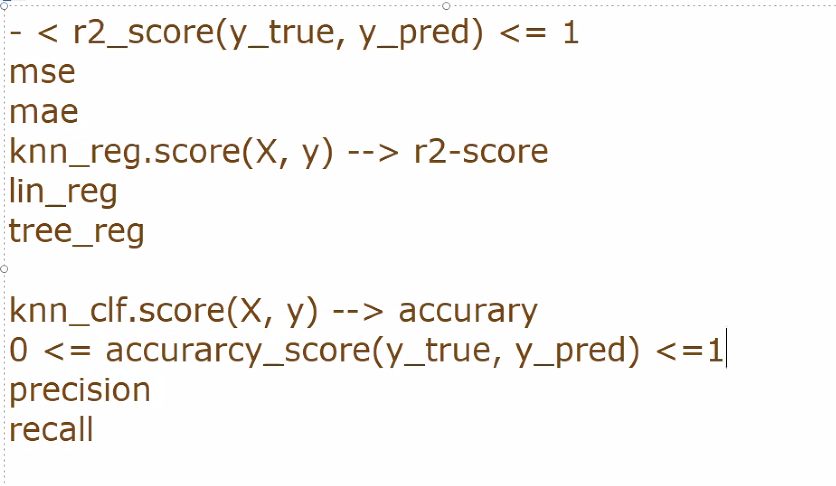

In [ ]:
te_pred = knn.predict(X_te)
te_pred[:4]

array([ 61.4,  92. , 248. , 119. ])

In [ ]:
y_te[:4]

array([  5.9, 100. , 250. , 130. ])

In [ ]:
knn_acc = r2_score(y_te, te_pred)
knn_acc
# train보다 더 높으므로 과소적합 판단

0.9921859636141724

### linear

In [ ]:
lnn_reg = LinearRegression() #객체 생성

In [ ]:
lnn_reg.fit(X_tr,y_tr)

LinearRegression()

In [ ]:
lnntr_pred = lnn_reg.predict(X_tr) #훈련 예측값
lnntr_pred[:4]

array([-18.09981638, 729.61037611, 214.4454512 , 858.70351644])

In [ ]:
y_tr[:4] #훈련 실제값

array([ 70., 700., 180., 850.])

In [ ]:
lnn_reg.coef_ #기울기
# 순서대로 length, diagona, hight, width

array([-61.34667863,  69.32916754,  64.18790225,  34.10078686])

In [ ]:
lnn_reg.intercept_ #Y절편

-628.0587677416643

In [ ]:
r2_score(y_tr, lnntr_pred) #훈련 결정계수

0.9551512820244804

In [ ]:
lnnte_pred = lnn_reg.predict(X_te) #테스트 예측값
lnnte_pred[:4]

array([-349.69543645,   47.30510799,  311.69917924,  176.24974603])

In [ ]:
y_te[:4] #테스트 실젯값

array([  5.9, 100. , 250. , 130. ])

In [ ]:
linear_acc = r2_score(y_te, lnnte_pred) #테스트 결정계수
linear_acc
#knn보다 결정계수가 작으므로 knn보다 나쁜 모델로 판단-과대적합으로 판단

0.880858279287726

###2차항 linear

In [ ]:
#2차항을 포함하는 선형회귀
X_tr.shape, y_tr.shape

((39, 4), (39,))

In [ ]:
X_tr[:3]

array([[17.4   , 18.5   ,  4.588 ,  2.9415],
       [36.    , 38.3   , 10.6091,  6.7408],
       [25.    , 26.5   ,  6.4395,  3.6835]])

In [ ]:
# 2차항을 만들기 위해서 ^2 하는것, y= ax^2 + bx + c
X_tr_poly = np.c_[X_tr **2,X_tr]
X_tr_poly.shape

(39, 8)

In [ ]:
X_tr_poly[:4]

array([[ 302.76      ,  342.25      ,   21.049744  ,    8.65242225,
          17.4       ,   18.5       ,    4.588     ,    2.9415    ],
       [1296.        , 1466.89      ,  112.55300281,   45.43838464,
          36.        ,   38.3       ,   10.6091    ,    6.7408    ],
       [ 625.        ,  702.25      ,   41.46716025,   13.56817225,
          25.        ,   26.5       ,    6.4395    ,    3.6835    ],
       [1600.        , 1789.29      ,  142.29149796,   50.50092096,
          40.        ,   42.3       ,   11.9286    ,    7.1064    ]])

In [ ]:
lnn_reg2 = LinearRegression() #객체 생성

In [ ]:
lnn_reg2.fit(X_tr_poly,y_tr)

LinearRegression()

In [ ]:
reg2_tr_pred = lnn_reg2.predict(X_tr_poly)
reg2_tr_pred[:4]

array([ 59.07273839, 676.27709192, 183.63190197, 890.63030596])

In [ ]:
y_tr[:4]

array([ 70., 700., 180., 850.])

In [ ]:
r2_score(y_tr, reg2_tr_pred) # 훈련 셋 정확도

0.9888410165395659

In [ ]:
X_te_poly = np.c_[X_te **2, X_te]
X_te_poly.shape

(17, 8)

In [ ]:
reg2_te_pred = lnn_reg2.predict(X_te_poly)
reg2_te_pred[:4]

array([ 50.78605968,  60.55299103, 253.05191184, 120.55500311])

In [ ]:
y_te[:4]

array([  5.9, 100. , 250. , 130. ])

In [ ]:
linear_acc2 = r2_score(y_te,reg2_te_pred) # 테스트 셋 결정계수
linear_acc2

0.9846660496115628

### 파이프라인 이용해서 2차형 선형회귀 만들기

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
linear2 = LinearRegression()

In [ ]:
# 변환기 -> 예측기 순서로 파이프라인 생성
model2 = Pipeline([('poly',poly),('reg',linear2)])

In [ ]:
model2['poly'].get_feature_names_out()
# 각각의 파이프에 이름을 주는 이유-> 이름을 사용해서 객체를 찾기 위해

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [ ]:
model2.fit(X_tr,y_tr) #모델 훈련

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [ ]:
X_tr.shape, y_tr.shape

((39, 4), (39,))

In [ ]:
tr_pred2 = model2.predict(X_tr)
tr_pred2

array([  44.58853086,  688.54821667,  167.27817011,  883.82509887,
        901.074753  ,  997.68501751,  112.81916047,  109.18667519,
        127.17087565,  205.09933399,  254.12271248, 1019.55701159,
        888.41672852,  151.21226341,  130.43650773,  259.64094579,
        960.41838194,  504.96443598,  208.88722904,  730.56553489,
         62.50646351,  126.37464979,   37.63534738,  646.25924913,
        818.63085282,  308.93880973,  143.009409  ,  720.44545762,
         97.00808467,  126.42863391,  144.7160315 , 1047.26827837,
        157.50961316,   54.54335937,  679.6142687 ,  140.93410186,
        222.63834951, 1061.58436719,  595.45708907])

In [ ]:
tr_pred2.shape

(39,)

In [ ]:
te_pred2 = model2.predict(X_te)
te_pred2[:4]

array([ -6.81636171,   7.05986708, 279.50378618, 124.944857  ])

In [ ]:
te_pred2.shape

(17,)

In [ ]:
r2_score(y_tr,tr_pred2)

0.9916713750151561

In [ ]:
pipe_score = r2_score(y_te,te_pred2)
pipe_score

0.9472554532619826

In [ ]:
models = pd.DataFrame({'model':['KNN','Linear','Linear_2차항','pipeline'],
                       'Score':[knn_acc,linear_acc,linear_acc2,pipe_score]})
models.sort_values(by='Score', ascending=False)

,model,Score
0,KNN,0.992186
2,Linear_2차항,0.984666
3,pipeline,0.947255
1,Linear,0.880858
